<a href="https://colab.research.google.com/github/vitorpohlenz/python_exercises/blob/list_10/solutions/Exercises_Solutions_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Language

[EN] Please select the language.

[PT] Por favor selecione a linguadem.

In [1]:
# 'PTBR': Português
# 'EN': English
LANGUAGE = 'PTBR'

# Setup

In [2]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md # Displaying Markdown as "prints"

<font color = "yellow">[EN] Please do not change the following code! </font>

<font color = "yellow">[PT] Por favor não altere o código abaixo! </font>

In [3]:
!git clone https://github.com/vitorpohlenz/python_exercises.git --branch list_10 --single-branch

Cloning into 'python_exercises'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 82 (delta 19), reused 11 (delta 4), pack-reused 38 (from 1)
Receiving objects: 100% (82/82), 606.41 KiB | 9.78 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [4]:
# Reading Markdown file with the exercises.
with open(f'python_exercises/exercises/List_10_{LANGUAGE}.md','r') as file:
  exercises_raw = file.read()

In [5]:
# Header of the file.
header = exercises_raw.split('## 1')[0]

In [6]:
# Raw string with the questions.
questions_raw = exercises_raw.replace(header,'')

In [7]:
# Putting the questions in to a dict to be displayed.
questions = dict()
for q_string in questions_raw.split(';'):
  if '## ' in q_string:
    q_num = int(q_string.replace('## ','').split('.')[0])
    questions[q_num] = q_string

# Suggested Solutions
[EN] The solutions provided are just suggestions, there are other possible solutions.

For now on <font color = "whitegreen"> feel free to change</font> the code if you want, and <font color = "yellow"> please report any issues!</font>

[PT] As soluções fornecidas aqui são apenas sugestões, existem outras soluções possíveis.

Daqui em diante <font color = "whitegreen"> fique a vontade para modificar</font> o código se quiser, e <font color = "yellow"> por favor reportem qualquer problema!</font>



In [8]:
md(header)

# Exercícios PyTorch



> [EN] Note: In this notebook used these imports.

> [PT] Nota: Neste notebook são utilizadas essas importações.

```
import numpy as np
from numba import jit, cuda
import cupy as cp
import math
import time
```

In [9]:
md(questions.get(1))

## 1. Regressão com o Dataset Penguins
Utilize o dataset `penguins` disponível na biblioteca `seaborn` para construir um modelo de regressão com PyTorch.

O objetivo é prever a massa corporal (`body_mass_g`) dos pinguins com base em atributos como o comprimento do bico (`bill_length_mm`) e a profundidade do bico (`bill_depth_mm`).

Carregue o dataset utilizando `seaborn.load_dataset('penguins')` e então treine um modelo linear e avalie o resultado no conjunto de teste, após treine um modelo não linear e avalie o resultado no conjunto de teste. 

> Por que existe essa diferença?


Root Mean Squared Error on Test Set (Linear Model): 851.7344069602918
Root Mean Squared Error on Test Set (Non-Linear Model): 510.0194389677711


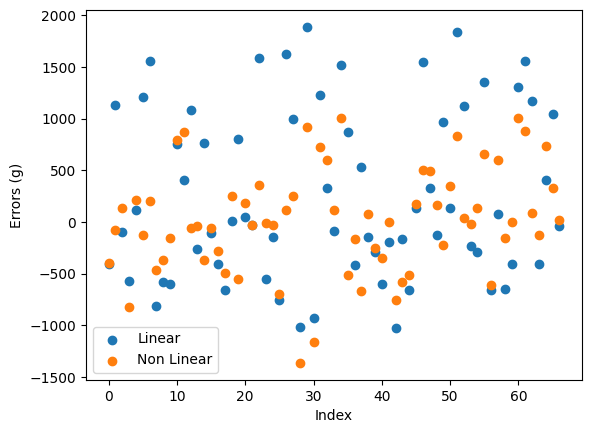

In [10]:
# Loading Penguins dataset
data = sns.load_dataset("penguins").dropna()

# Features and target
features_names = ['bill_length_mm', 'bill_depth_mm']
target_name = 'body_mass_g'

X = data[features_names].values
y = data[target_name].values.reshape(-1, 1)

# Normalizing the data
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

# Train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()


# 5 layers non linear model
class NonLinearRegressionModel(nn.Module):
    def __init__(self):
        super(NonLinearRegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

model_nonlinear = NonLinearRegressionModel()

# Loss function and optmizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer_non_linear = optim.Adam(model_nonlinear.parameters(), lr=0.001)


# Treinar o modelo
epochs = 1000
losses_non_linear = []
for epoch in range(epochs):
    model_nonlinear.train()
    optimizer_non_linear.zero_grad()
    outputs_non_linear = model_nonlinear(X_train)
    loss_non_linear = criterion(outputs_non_linear, y_train)
    loss_non_linear.backward()
    optimizer_non_linear.step()
    losses_non_linear.append(loss_non_linear.item())

# Training
epochs = 1000
losses = []
losses_non_linear = []
for epoch in range(epochs):
  # Linear
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

  # Non Linear
    model_nonlinear.train()
    optimizer_non_linear.zero_grad()
    outputs_non_linear = model_nonlinear(X_train)
    loss_non_linear = criterion(outputs_non_linear, y_train)
    loss_non_linear.backward()
    optimizer_non_linear.step()
    losses_non_linear.append(loss_non_linear.item())

# Evaluating
model.eval()
with torch.no_grad():
  # Linear
    predictions = model(X_test)
    test_loss = criterion(predictions, y_test)
    print(f"Root Mean Squared Error on Test Set (Linear Model): {np.sqrt(test_loss.item())}")
  # Non Linear
    predictions_non_linear = model_nonlinear(X_test)
    test_loss_non_linear = criterion(predictions_non_linear, y_test)
    print(f"Root Mean Squared Error on Test Set (Non-Linear Model): {np.sqrt(test_loss_non_linear.item())}")


    # Plotting errors
    plt.scatter(x=range(len(y_test)), y = y_test - predictions, label="Linear")
    plt.scatter(x=range(len(y_test)), y = y_test - predictions_non_linear, label="Non Linear")
    plt.xlabel("Index")
    plt.ylabel("Errors (g)")
    plt.legend()
    plt.show()


In [11]:
md(questions.get(2))



## 2. Classificação com o Dataset Iris
Treine um modelo de classificação com PyTorch para prever a espécie de cada flor no dataset Iris com base em suas características.
Para tal, carregue esse data set utilizando a função `load_iris()` disponível em `sklearn.datasets`.

Epoch 100/200, Loss: 0.6451584696769714
Epoch 200/200, Loss: 0.5893081426620483
Accuracy on Test Set: 0.97


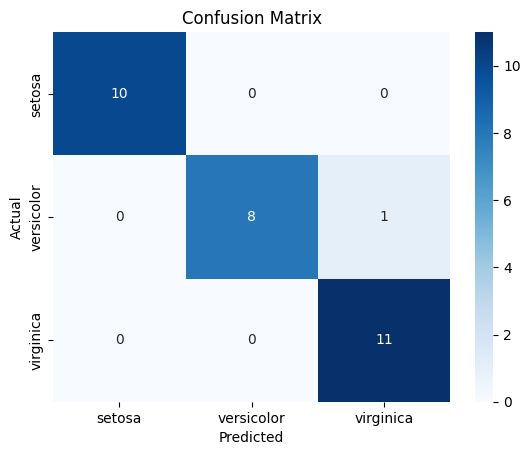

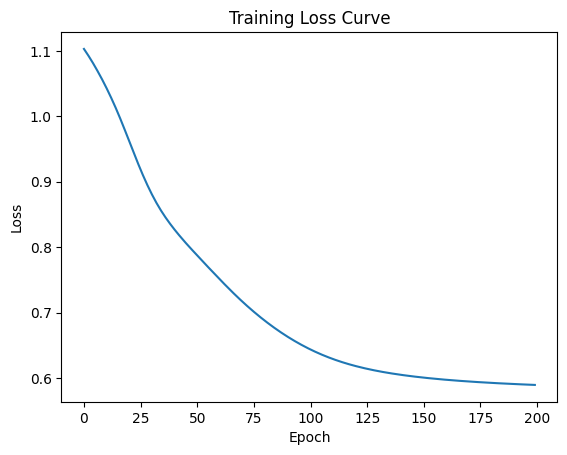

In [12]:
# Loading Iris dataset
iris = load_iris()
X = iris.data  # Features (4)
y = iris.target  # Classes (0, 1, 2)

# Train, test split (80%) (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)  # For classification
y_test = torch.tensor(y_test, dtype=torch.long)

# Classification model
class IrisClassifier(nn.Module):
    def __init__(self):
        super(IrisClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(4, 16),
            nn.ReLU(),
            nn.Linear(16, 3),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        return self.network(x)

model = IrisClassifier()

# Loss function and optmizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training
epochs = 200
losses = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

# Model evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    _, predicted_classes = torch.max(predictions, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted_classes.numpy())
    print(f"Accuracy on Test Set: {accuracy:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test.numpy(), predicted_classes.numpy())
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Loss curves
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()
